# Instalando libs necessárias

In [0]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 2.8MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


# Carregando os dados

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/SrDiegoH/DataScience/master/machine-learning-algoritmos-nao-supervisionados/movies.csv")

filmes.columns = ["filme_id", "titulo", "generos"]

In [0]:
filmes.head(3)

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [0]:
generos = filmes.generos.str.get_dummies()
filmes_df = pd.concat([filmes, generos], axis=1)

In [0]:
filmes_df.head(3)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Manipulando dados

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
print(f"Colunas dos Generos: {generos.columns}")

Colunas dos Generos: Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [0]:
from sklearn.cluster import KMeans

In [0]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
print(f'Grupos: {modelo.labels_}')
print(f"Clusters: {modelo.cluster_centers_}")

Grupos: [2 2 0 ... 0 2 0]
Clusters: [[ 0.0317986  -0.17221517 -0.09609698 -0.25282145 -0.27045122  0.183437
  -0.27808305  0.11306209  0.07053001 -0.08885492 -0.08989352 -0.11613781
  -0.05843697  0.01018049 -0.22047572  0.16322315 -0.07526955 -0.48687277
   0.07115097  0.04056819]
 [-0.05917995  0.45087365 -0.10765877 -0.2333134  -0.26719745 -0.55963096
   0.84717995 -0.21354076  0.05127256 -0.12248588  0.27115761  0.4108626
   0.02091406 -0.17489929  0.62305687 -0.31634824  0.14400667  1.45127272
  -0.11752555 -0.07204999]
 [-0.05917995 -0.00864732  0.90222182  2.24759932  2.4488033   0.20962694
  -0.31476151 -0.20253474 -0.59213503  0.89214979 -0.09492563 -0.27549544
   0.33054416  0.37480914 -0.12679203 -0.27202043  0.1301769  -0.47033271
  -0.17001952 -0.08421394]]


In [0]:
grupos_df = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.031799,-0.172215,-0.096097,-0.252821,-0.270451,0.183437,-0.278083,0.113062,0.070530,-0.088855,-0.089894,-0.116138,-0.058437,0.010180,-0.220476,0.163223,-0.075270,-0.486873,0.071151,0.040568
1,-0.059180,0.450874,-0.107659,-0.233313,-0.267197,-0.559631,0.847180,-0.213541,0.051273,-0.122486,0.271158,0.410863,0.020914,-0.174899,0.623057,-0.316348,0.144007,1.451273,-0.117526,-0.072050
2,-0.059180,-0.008647,0.902222,2.247599,2.448803,0.209627,-0.314762,-0.202535,-0.592135,0.892150,-0.094926,-0.275495,0.330544,0.374809,-0.126792,-0.272020,0.130177,-0.470333,-0.170020,-0.084214


## Mostrando dados transpostos

Transposição dos dados
* https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69fec7b710>,
      dtype=object)

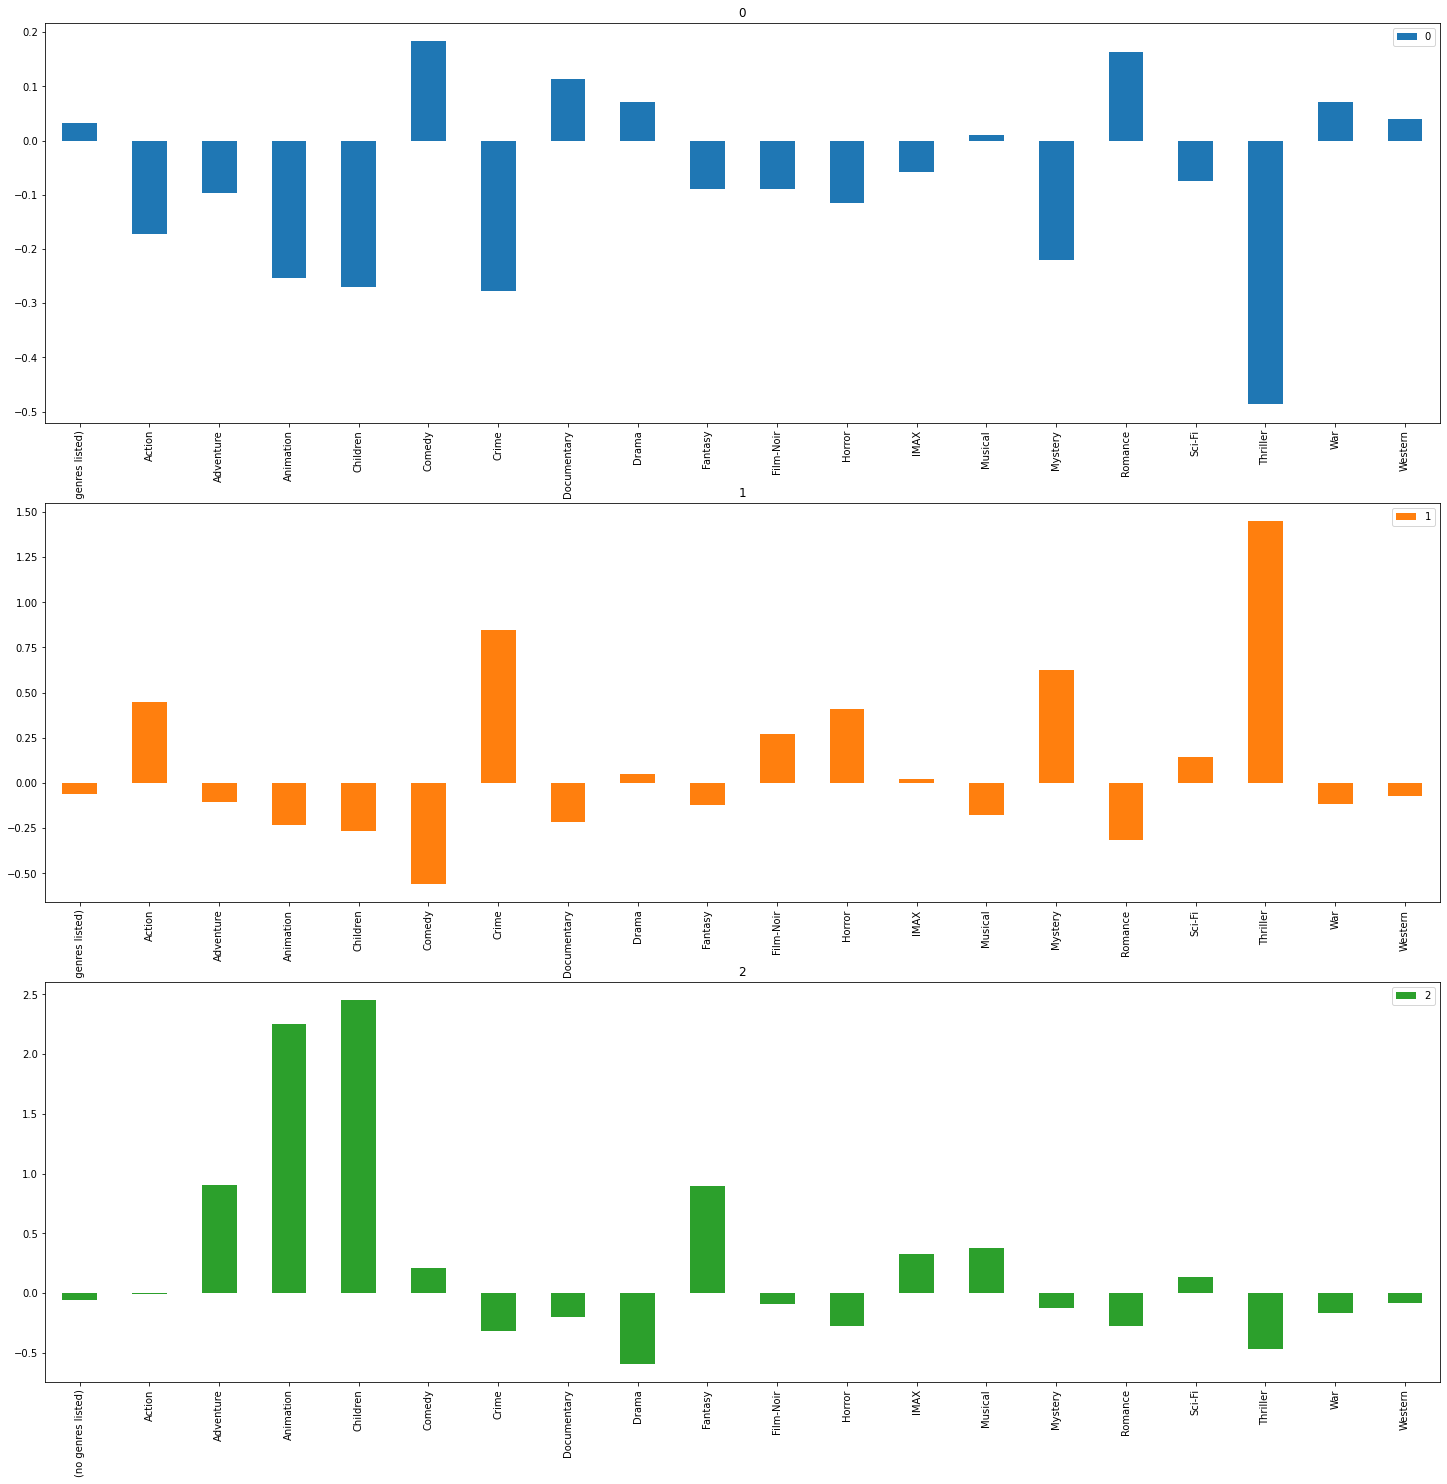

In [0]:
grupos_df.transpose().plot.bar(subplots=True, figsize=(25, 25), sharex=False)

## Visualizando clusters

In [0]:
grupo_zero = 0

filtro = (modelo.labels_ == grupo_zero)

filmes_df[filtro].sample(7)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4000,5644,"Pride of the Yankees, The (1942)",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8705,123947,Cake (2014),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9635,179211,Christina P: Mother Inferior (2017),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8305,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3708,5113,After the Fox (Caccia alla volpe) (1966),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4299,6285,Levity (2003),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2889,3864,Godzilla 2000 (Gojira ni-sen mireniamu) (1999),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE()

matriz_de_visualizacao = tsne.fit_transform(generos_escalados)
matriz_de_visualizacao

array([[ 17.314178 , -68.559166 ],
       [-26.662231 , -36.491837 ],
       [-32.4177   ,  18.091116 ],
       ...,
       [-19.402967 , -13.178569 ],
       [  5.1696067, -54.76461  ],
       [ 12.945105 ,   2.5233474]], dtype=float32)

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


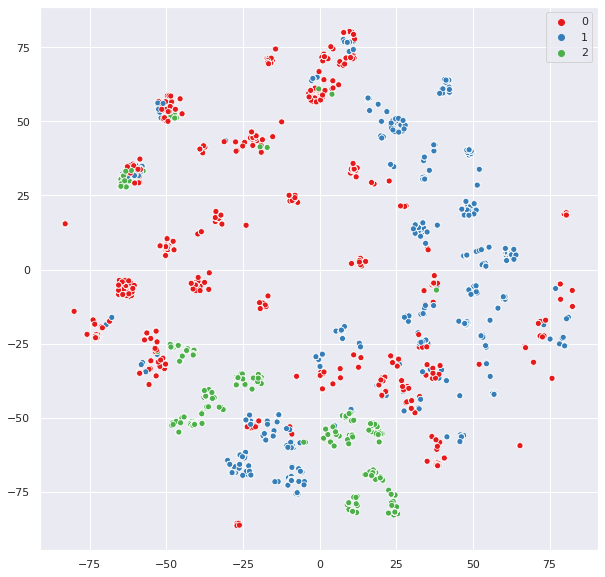

In [0]:
sns.set(rc={'figure.figsize': (10, 10)})

sns.scatterplot(x=matriz_de_visualizacao[:, 0], y=matriz_de_visualizacao[:, 1], hue=modelo.labels_, palette=sns.color_palette('Set1', 3))

## Testando com mais clusters

In [0]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69fb89de10>,
      dtype=object)

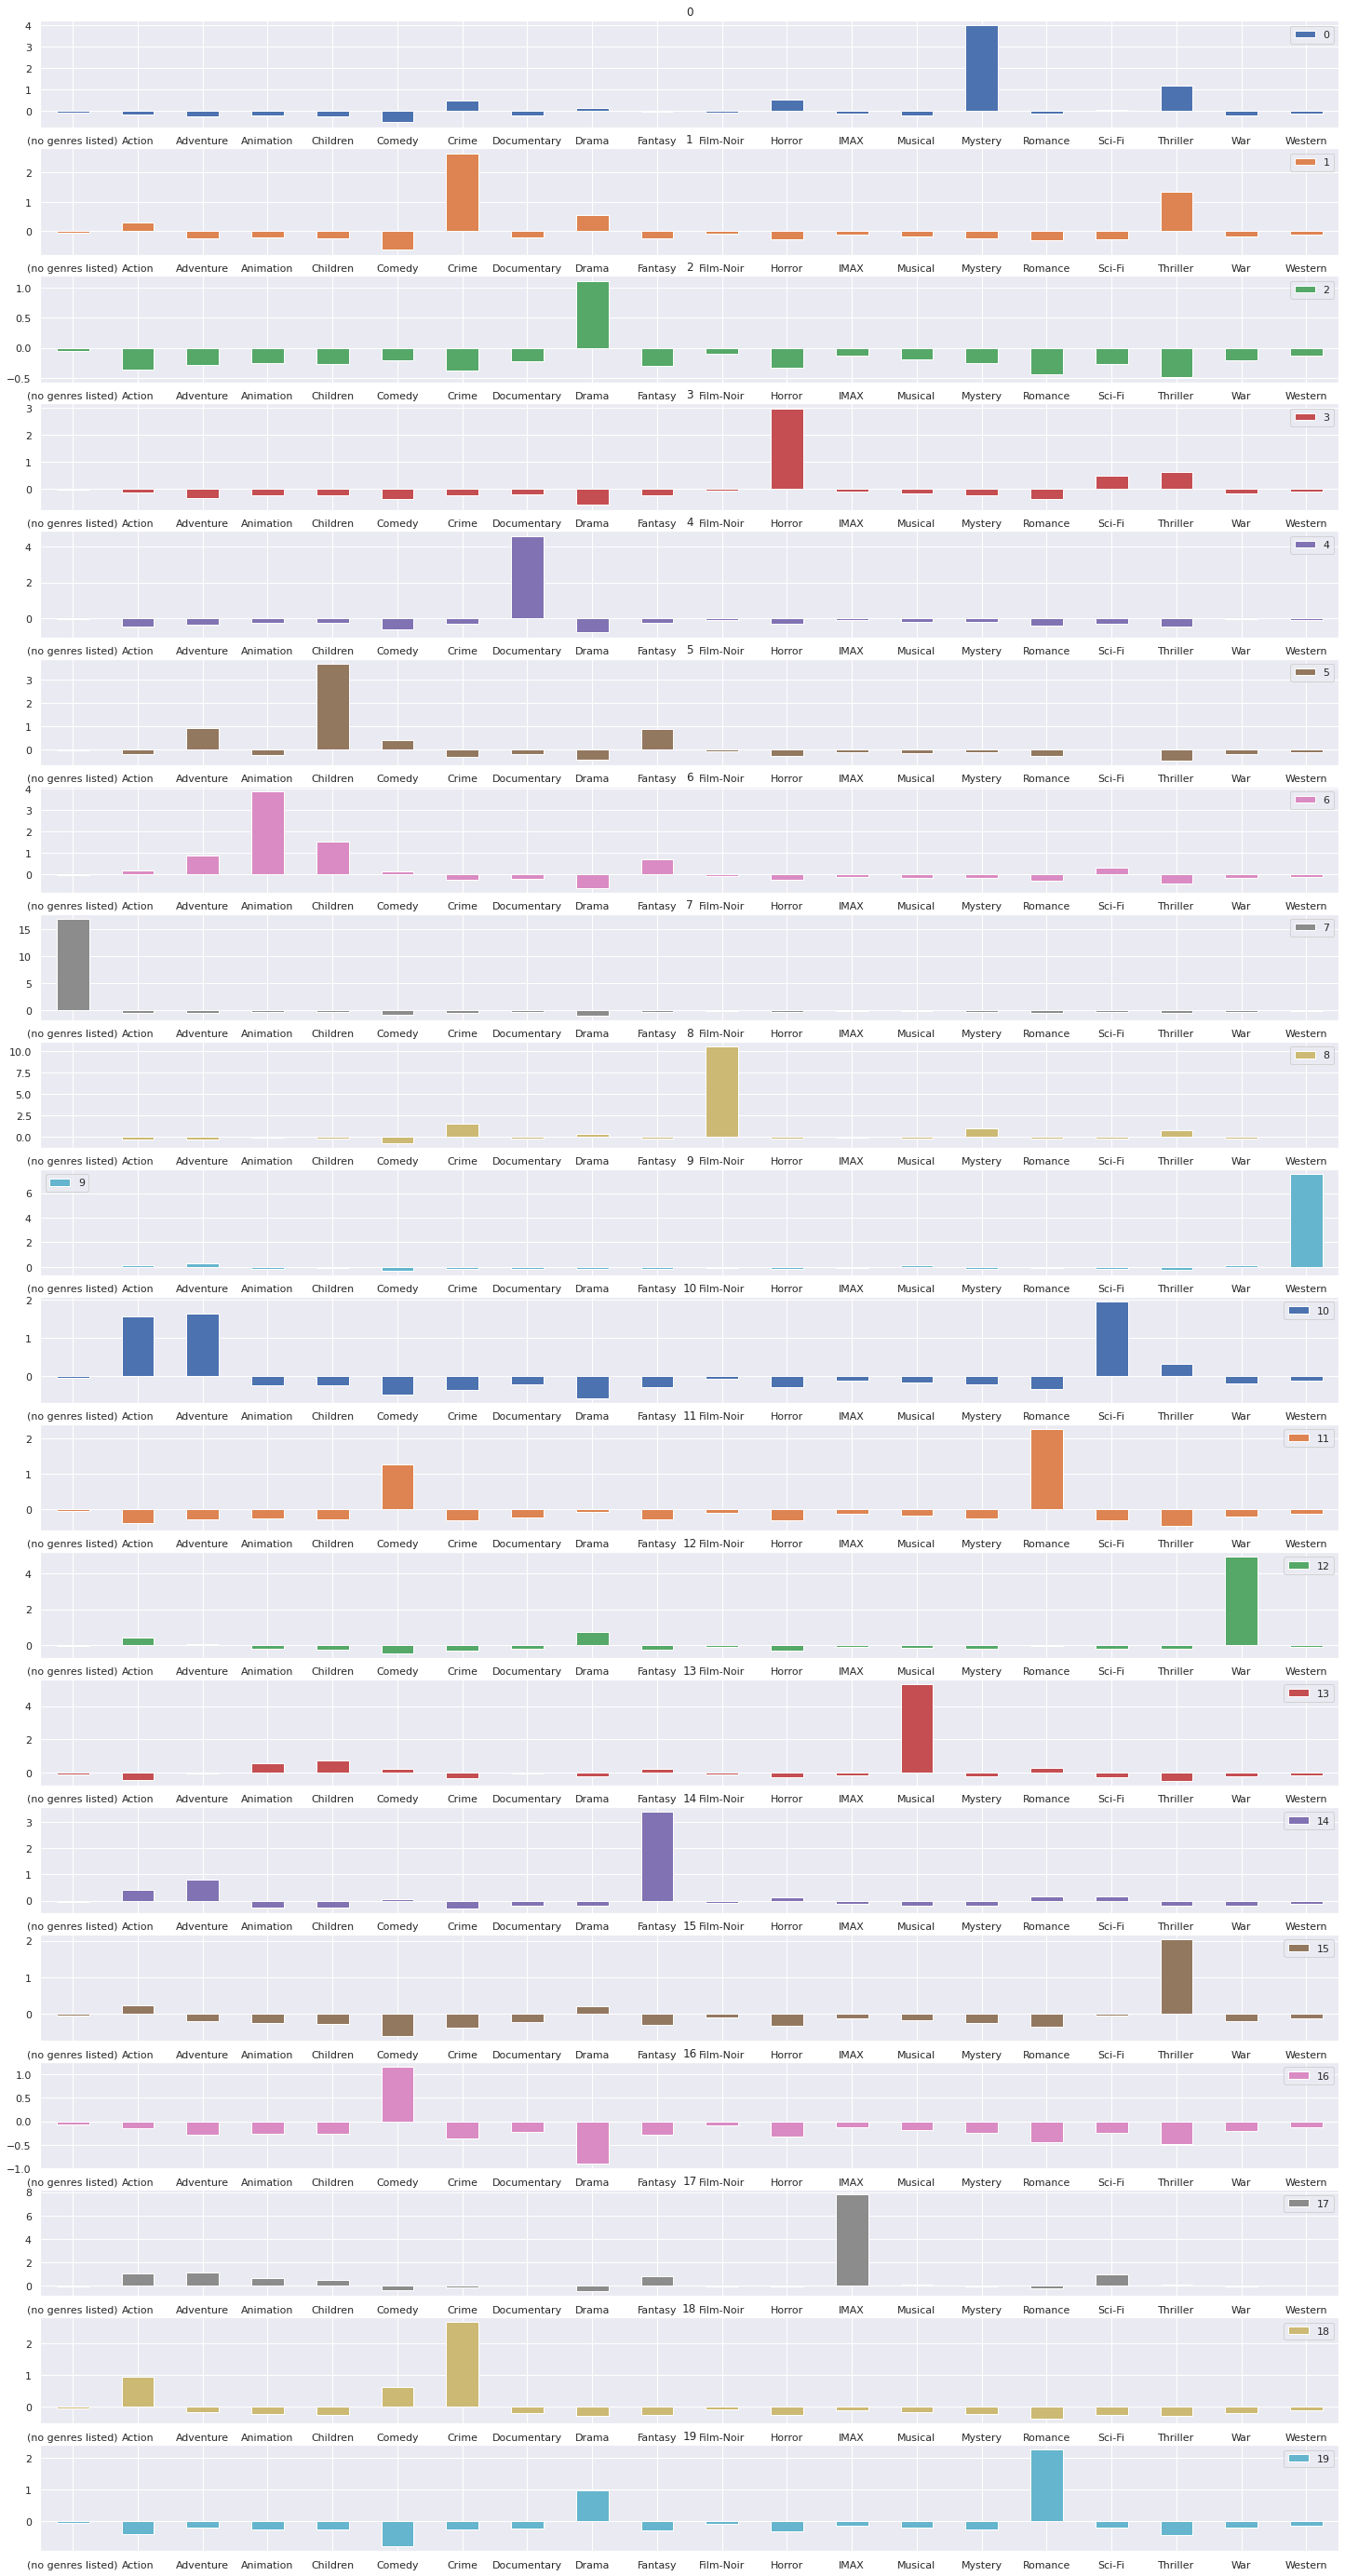

In [0]:
grupos_df = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos_df.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

In [0]:
grupo_dois = 2

filtro = (modelo.labels_ == grupo_dois)

filmes_df[filtro].sample(3)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2370,3145,Cradle Will Rock (1999),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5192,8451,Blackboard Jungle (1955),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2483,3308,"Flamingo Kid, The (1984)",Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Gerando clusters e mostrando resultados 

In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [0]:
kmeans(20, generos_escalados)

[20, 55484.23786274195]

In [0]:
kmeans(3, generos_escalados)

[3, 166185.0246690332]

In [0]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado[:5]

[[1, 194840.0],
 [2, 179664.9990790031],
 [3, 168285.5664349404],
 [4, 156622.8836623756],
 [5, 145993.22846560337]]

In [0]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado.head(7)

,grupos,inertia
0,1,194840.000000
1,2,179664.999079
2,3,168285.566435
3,4,156622.883662
4,5,145993.228466
5,6,138304.454140
6,7,127329.868540


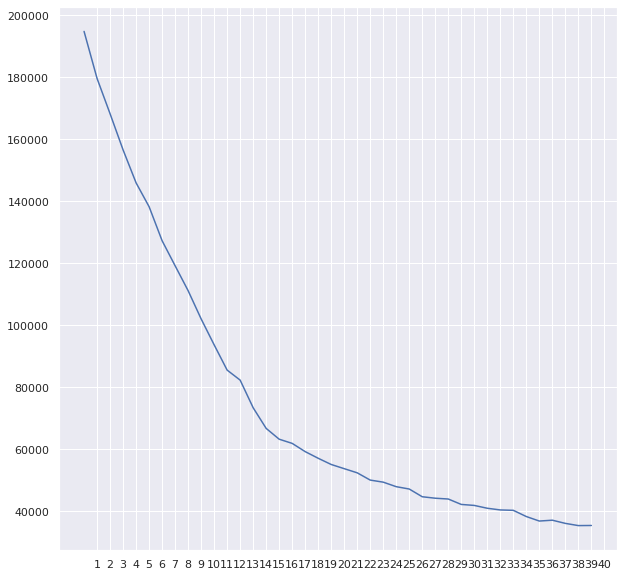

In [0]:
resultado.inertia.plot(xticks=resultado.grupos)

In [0]:
modelo = KMeans(n_clusters=17)

modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69fa936550>,
      dtype=object)

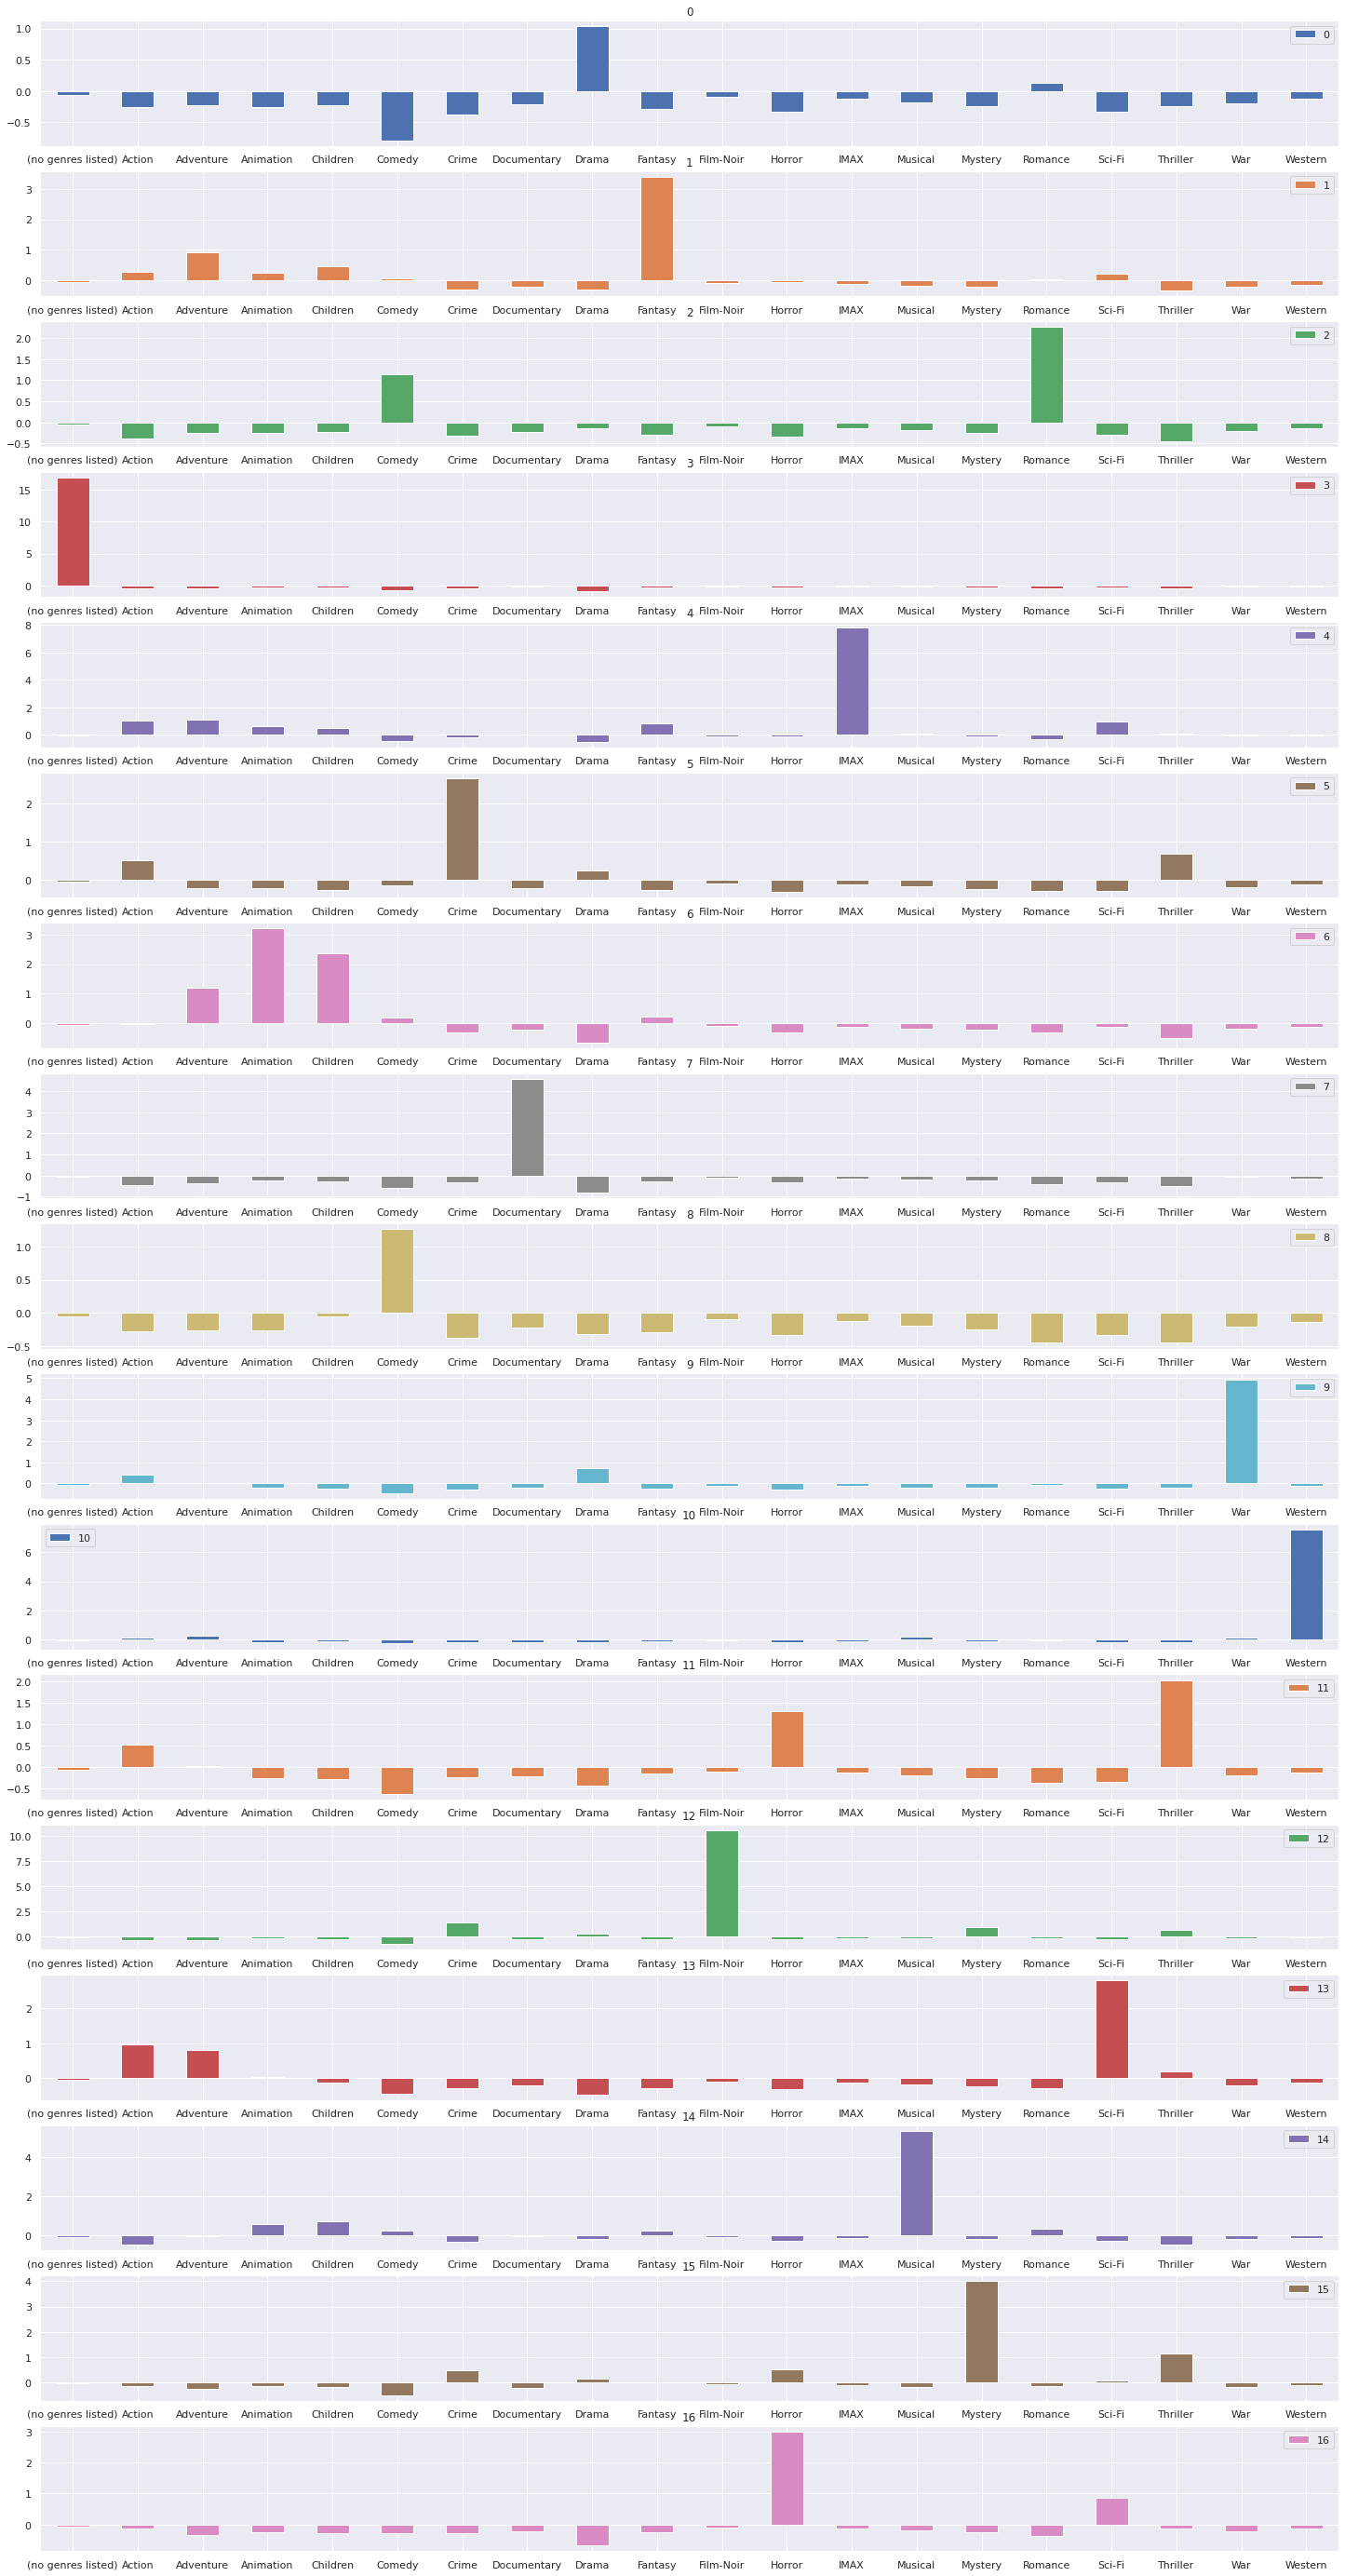

In [0]:
grupos_df = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos_df.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

In [0]:
grupo_dezeseis = 16

filtro = (modelo.labels_ == grupo_dezeseis)

filmes_df[filtro].sample(3)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1854,2465,Deadly Friend (1986),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2154,2868,Fright Night Part II (1988),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2002,2664,Invasion of the Body Snatchers (1956),Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [0]:
tsne = TSNE()

matriz_de_visualizacao = tsne.fit_transform(generos_escalados)
matriz_de_visualizacao

array([[ -1.661651 , -56.84407  ],
       [-12.192097 , -49.425316 ],
       [ 46.369267 ,  -2.5989666],
       ...,
       [ 16.737787 , -11.884921 ],
       [-23.32274  , -31.382006 ],
       [-20.354774 ,   1.2531489]], dtype=float32)

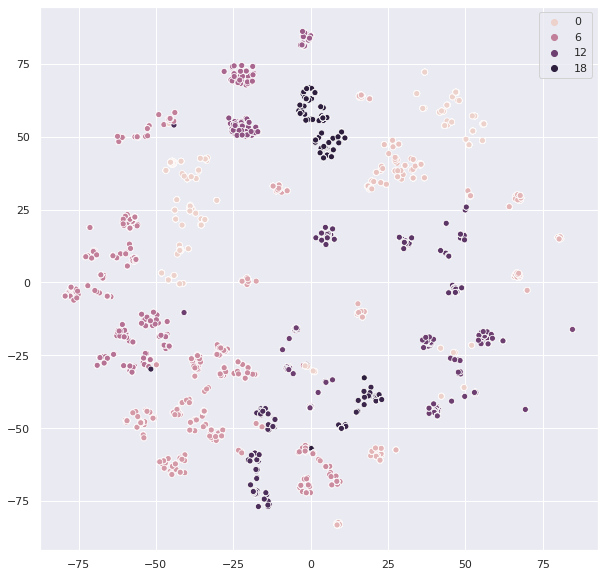

In [0]:
sns.scatterplot(x=matriz_de_visualizacao[:, 0], y=matriz_de_visualizacao[:, 1], hue=grupos)

# Mostrando dados em um Dendograma

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69f9de1ba8>,
      dtype=object)

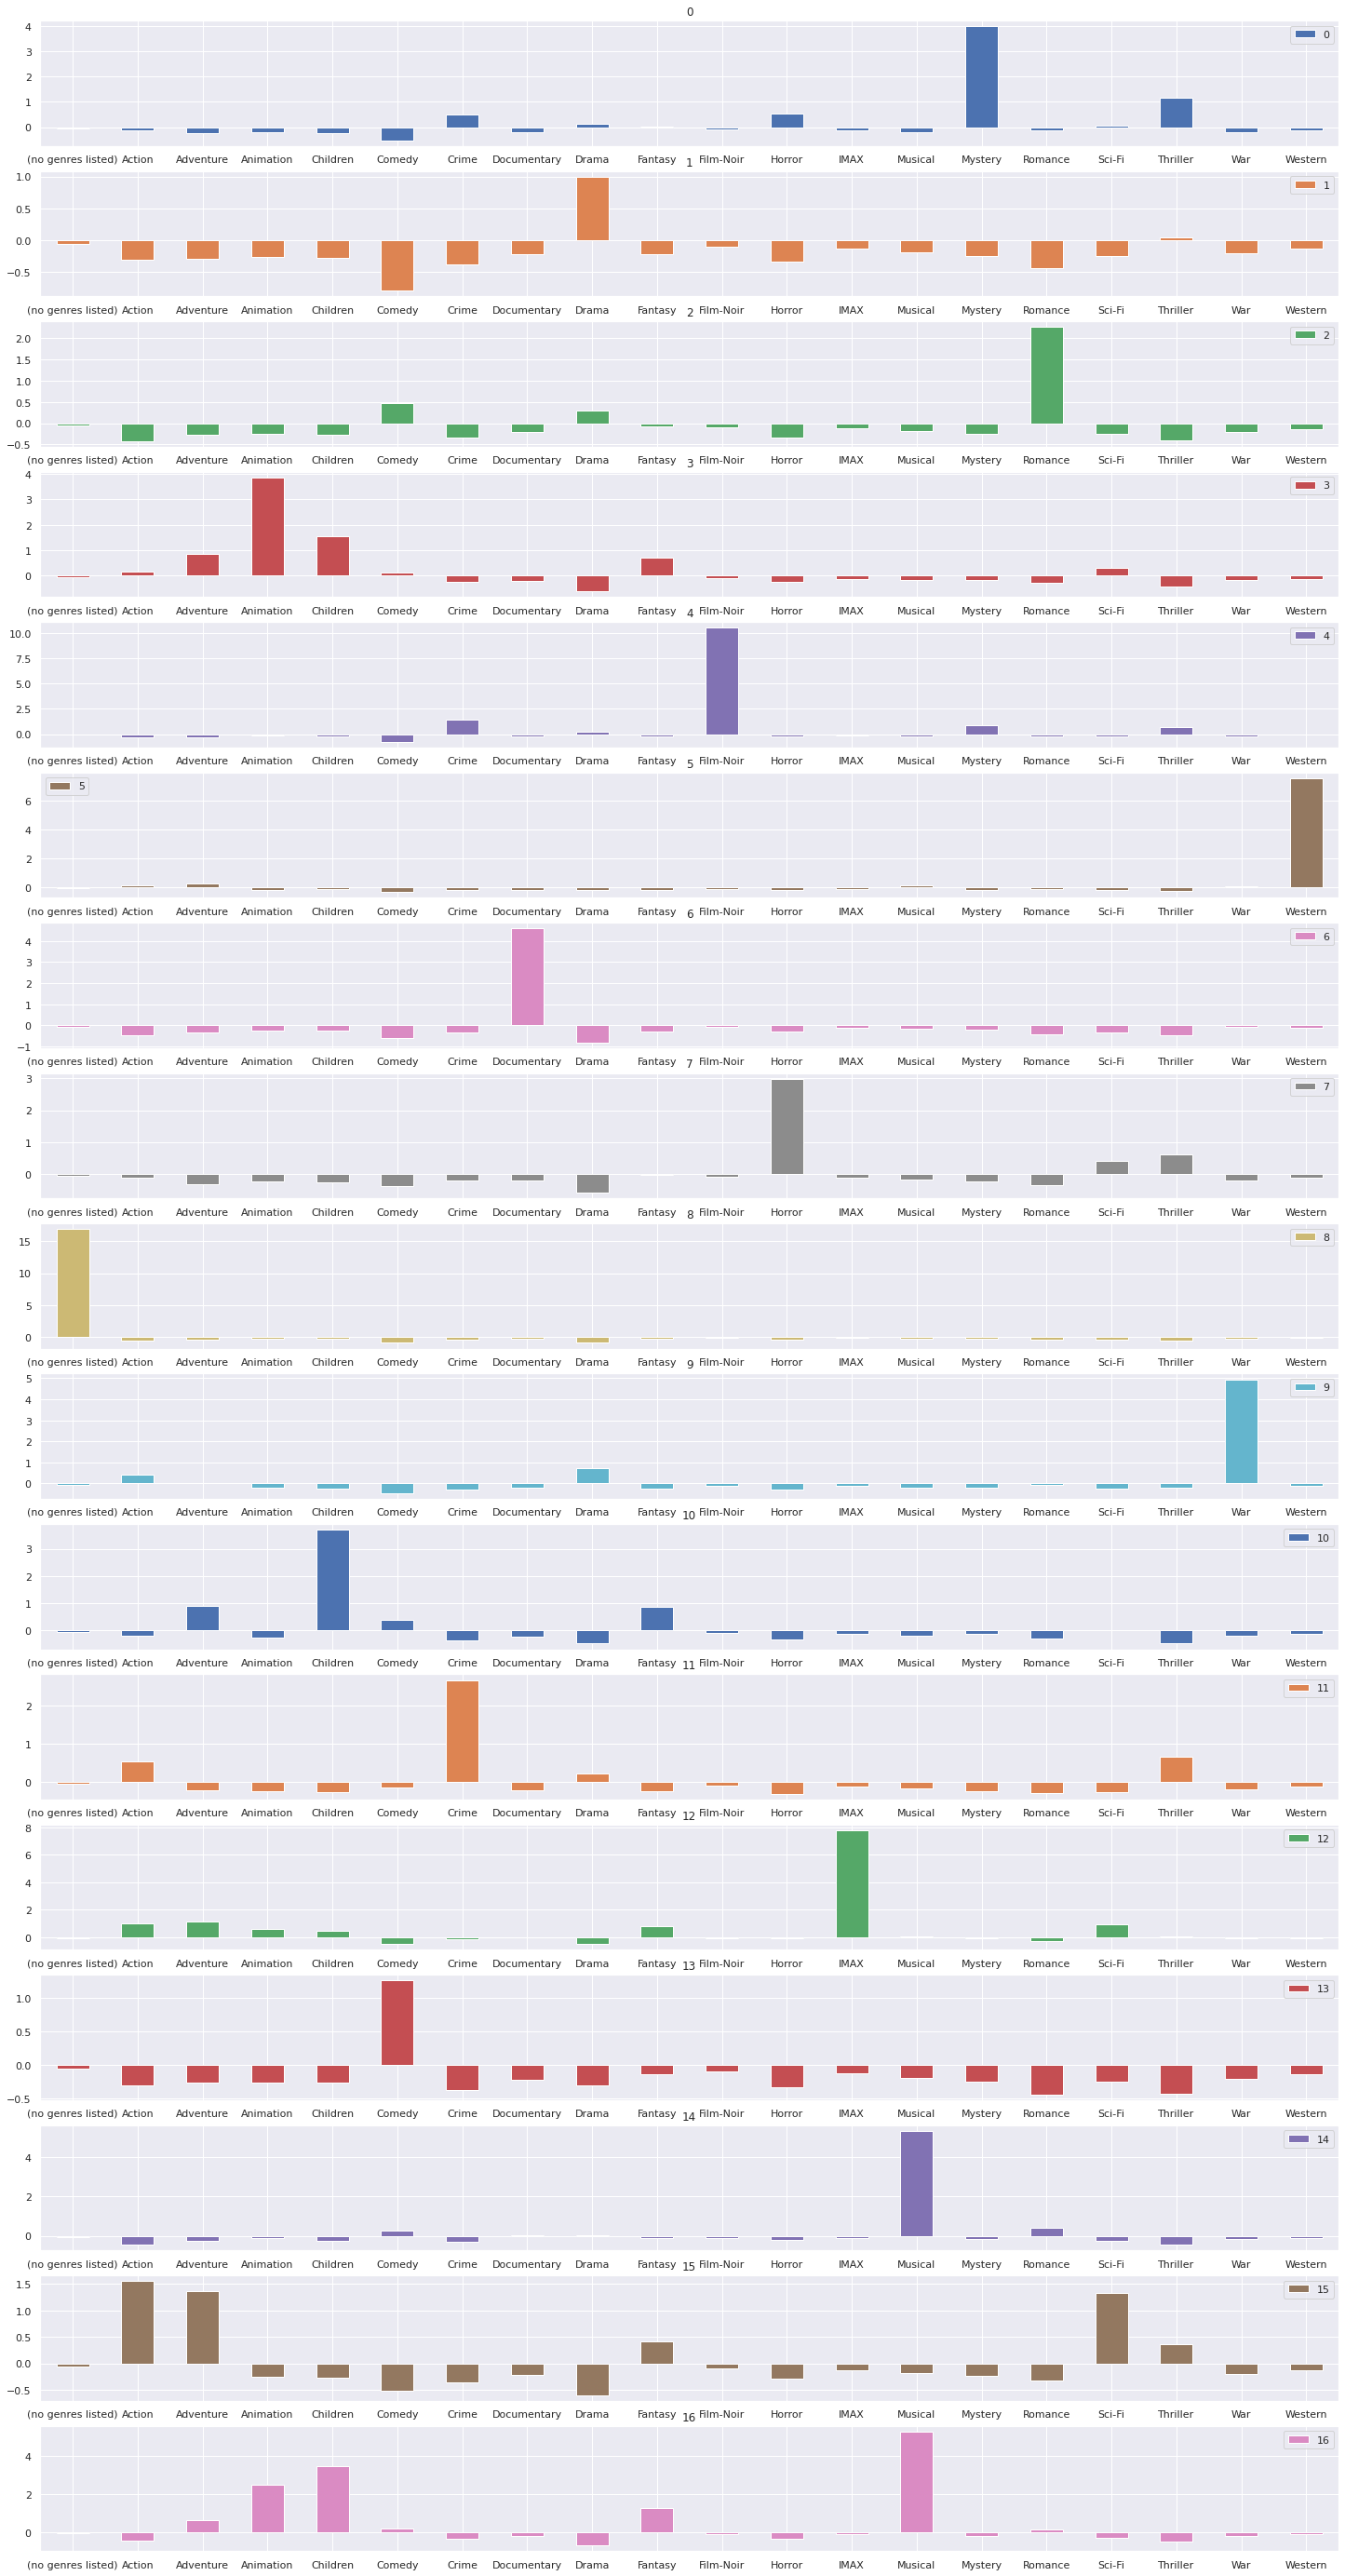

In [0]:
grupos_df = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos_df.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

In [0]:
matriz_de_distancia = linkage(grupos_df)
matriz_de_distancia

array([[ 1.        , 13.        ,  2.47990729,  2.        ],
       [ 2.        , 17.        ,  2.88647556,  3.        ],
       [11.        , 18.        ,  3.37331553,  4.        ],
       [15.        , 19.        ,  3.43002496,  5.        ],
       [ 7.        , 20.        ,  3.82278506,  6.        ],
       [10.        , 21.        ,  4.36293965,  7.        ],
       [ 0.        , 22.        ,  4.67583298,  8.        ],
       [ 3.        , 23.        ,  4.69237742,  9.        ],
       [14.        , 16.        ,  4.9253709 ,  2.        ],
       [ 6.        , 24.        ,  5.17761691, 10.        ],
       [ 9.        , 26.        ,  5.24753962, 11.        ],
       [25.        , 27.        ,  5.66546674, 13.        ],
       [ 5.        , 28.        ,  7.87182206, 14.        ],
       [12.        , 29.        ,  8.06307666, 15.        ],
       [ 4.        , 30.        , 10.81689921, 16.        ],
       [ 8.        , 31.        , 17.0723362 , 17.        ]])

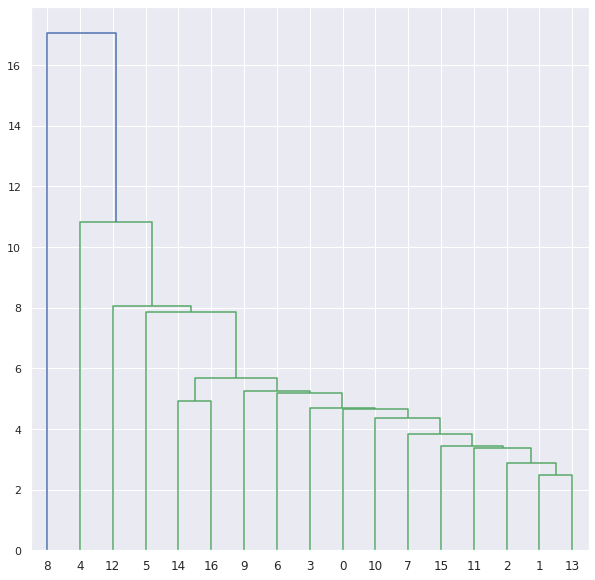

In [0]:
dendrograma = dendrogram(matriz_de_distancia)